# Importing required libraries
1. pandas
2. numpy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
1. Load in data frame
2. Check the sample of data ( using head() )
3. Describe the Data and check info

In [2]:
bank_data = pd.read_csv('./Downloads/bank-full.csv')

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# check shape

print("Bank Data size rows=%s, cols=%s"%(bank_data.shape))

Bank Data size rows=45211, cols=17


# EDA :
1. Univariate Analysis
    - get Data types
    - view Description
    - view Distribution
    - check Missing Values

In [4]:
# 1.1 Get Data types
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Observation 
1. There are many attributes with object data type. 
2. We need to convert them to datatype(Int/Float/Category) that can be used for learning by the alogoritms

In [5]:
# List of columns having object Data type
bank_data.select_dtypes(include=object).head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [6]:
# 1.2 View the description of data

bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


D:\AIML\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


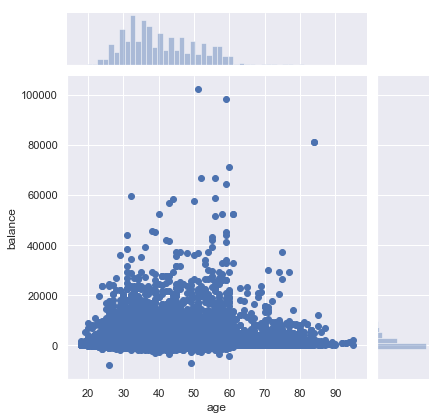

In [7]:
# 1.3 View the Distribution of Data
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(bank_data.age, bank_data.balance)

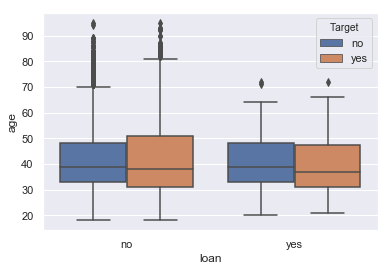

In [8]:
sns.boxplot(bank_data.loan, bank_data.age, hue=bank_data.Target)

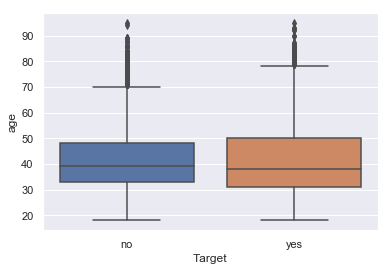

In [9]:
sns.boxplot(bank_data.Target, bank_data.age )

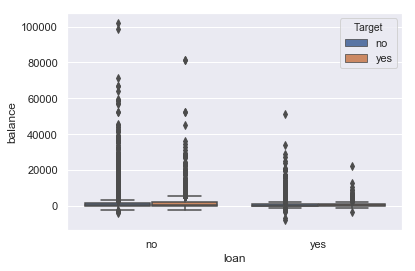

In [10]:
sns.boxplot(bank_data.loan, bank_data.balance, hue=bank_data.Target)

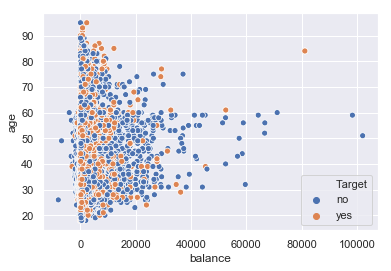

In [11]:
sns.scatterplot(bank_data.balance, bank_data.age, hue=bank_data.Target)

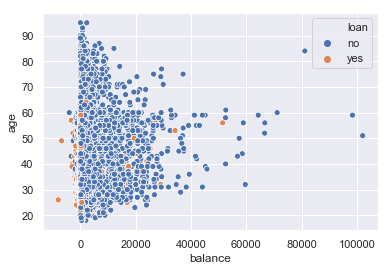

In [12]:
sns.scatterplot(bank_data.balance, bank_data.age, hue=bank_data.loan)

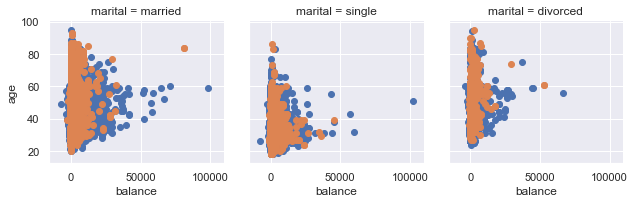

In [13]:
# Facet Grid

fg = sns.FacetGrid(bank_data, col='marital', hue='Target', legend_out=True)

fg.map(plt.scatter, 'balance',  'age')
plt.show()

# Check for valid data
1. Null data
2. Check for data types
look for Invalid entries (e.g ?)
3. Check for type of data

In [14]:
# Check for null data
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## As per above output there is no empty/null data in given sample data.
### Will do other checks for EDA

# Handling categorical data.
As it can be seen that columns object values. We need to do preprocessing on them.


In [15]:
for col in bank_data.select_dtypes(include=object):
    print("\n== Col : %s == \n"%col)
    print(bank_data[col].value_counts())


== Col : job == 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

== Col : marital == 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

== Col : education == 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

== Col : default == 

no     44396
yes      815
Name: default, dtype: int64

== Col : housing == 

yes    25130
no     20081
Name: housing, dtype: int64

== Col : loan == 

no     37967
yes     7244
Name: loan, dtype: int64

== Col : contact == 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

== Col : month == 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403

# Will do label encoding for the above columns having object data type


In [16]:
# Label encoding for 'contact'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# bank_data.contact = le.fit_transform(bank_data.contact)
# bank_data.poutcome = le.fit_transform(bank_data.poutcome)
# bank_data.poutcome = le.fit_transform(bank_data.poutcome)
# bank_data.poutcome = le.fit_transform(bank_data.poutcome)

for col in bank_data.select_dtypes(include=object):
    bank_data[col] = le.fit_transform(bank_data[col])
    


# The new data after encoding will be 

In [17]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Now as all columns are numerical will do statistical analysis

In [18]:
# check for distribution 

bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [19]:
analysis_bank_data = bank_data.drop('Target', axis=1)
target_col = bank_data.Target 
analysis_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

std_bank_data = pd.DataFrame(sc.fit_transform(analysis_bank_data), columns=analysis_bank_data.columns)


std_bank_data.describe().T

D:\AIML\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\AIML\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,count,mean,std,min,25%,50%,75%,max
age,45211.0,5.222844e-16,1.000011,-2.159994,-0.747384,-0.182341,0.665225,5.091402
job,45211.0,1.560056e-14,1.000011,-1.326082,-1.020516,-0.103820,0.812877,2.035139
marital,45211.0,4.638734e-15,1.000011,-1.919895,-0.275762,-0.275762,1.368372,1.368372
education,45211.0,-2.928306e-14,1.000011,-1.637474,-0.300556,-0.300556,1.036362,2.373280
default,45211.0,4.520540e-15,1.000011,-0.135490,-0.135490,-0.135490,-0.135490,7.380625
balance,45211.0,3.070663e-15,1.000011,-3.081149,-0.423772,-0.300280,0.021587,33.094776
housing,45211.0,1.382298e-14,1.000011,-1.118674,-1.118674,0.893915,0.893915,0.893915
loan,45211.0,-1.275129e-14,1.000011,-0.436803,-0.436803,-0.436803,-0.436803,2.289359
contact,45211.0,3.943212e-14,1.000011,-0.713012,-0.713012,-0.713012,1.514306,1.514306
day,45211.0,-9.219436e-15,1.000011,-1.779108,-0.938003,0.023260,0.624050,1.825628


D:\AIML\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


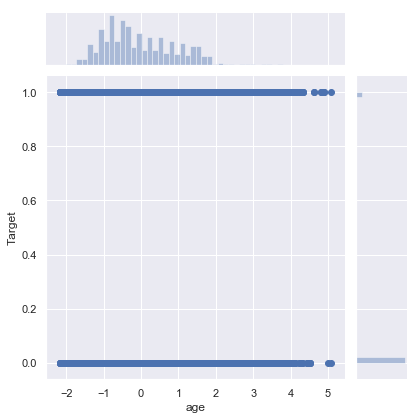

In [21]:
import seaborn as sns
sns.jointplot(std_bank_data.age, bank_data.Target)

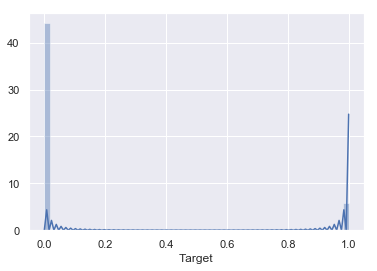

In [22]:
sns.distplot(bank_data['Target'])

### Target Variable seems skwed in nature and not evenly distributed,  and there is Imbalance in terms of classes.

# Applying Decision Tree

In [23]:
# Importing the required library
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Splitting the Data in Train and Test
from sklearn.model_selection import train_test_split

x = std_bank_data
y = bank_data['Target']

xtrain,xtest,ytrain,ytest = train_test_split(std_bank_data, y, test_size = 0.30, random_state = 0)

# Fit the Model on Training Dataset
dtree.fit(xtrain,ytrain)

# Make Predictions
model_tree = dtree.predict(xtest)

# Check the Accuracy of the Model
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

print(confusion_matrix(ytest, model_tree))
print("Accuracy :- %s age"%(round(accuracy_score(ytest,model_tree)*100, 2)))
print("Kappa Score :- %s age"%(round(cohen_kappa_score(ytest,model_tree)*100, 2)))

[[11023   946]
 [  836   759]]
Accuracy :- 86.86 age
Kappa Score :- 38.53 age


# Applying Logistic Reg

In [24]:
# Importing the required library
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# Splitting the Data in Train and Test
from sklearn.model_selection import train_test_split

x = std_bank_data
y = bank_data['Target']

xtrain,xtest,ytrain,ytest = train_test_split(std_bank_data, y, test_size = 0.30, random_state = 0)

# Fit the Model on Training Dataset
lg.fit(xtrain,ytrain)

# Make Predictions
model_lg = lg.predict(xtest)

# Check the Accuracy of the Model
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

print(confusion_matrix(ytest, model_lg))
print("Accuracy :- %s age"%(round(accuracy_score(ytest,model_lg)*100, 2)))
print("Kappa Score :- %s age"%(round(cohen_kappa_score(ytest,model_lg)*100, 2)))

D:\AIML\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[11702   267]
 [ 1248   347]]
Accuracy :- 88.83 age
Kappa Score :- 26.62 age


# Applying Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Fit the Random Forest Model
rf.fit(xtrain,ytrain)

# Fit the Random Forest Model
rf_model = rf.predict(xtest)

print(confusion_matrix(ytest, rf_model))
print("Accuracy :- %s age"%(round(accuracy_score(ytest,rf_model)*100, 2)))
print("Kappa Score :- %s age"%(round(cohen_kappa_score(ytest,rf_model)*100, 2)))

D:\AIML\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11571   398]
 [  988   607]]
Accuracy :- 89.78 age
Kappa Score :- 41.36 age


In [26]:
# Apply Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
gb_model = gb.predict(xtest)

print(confusion_matrix(ytest, gb_model))
print("Accuracy :- %s age"%(round(accuracy_score(ytest,gb_model)*100, 2)))
print("Kappa Score :- %s age"%(round(cohen_kappa_score(ytest,gb_model)*100, 2)))

[[11603   366]
 [  968   627]]
Accuracy :- 90.17 age
Kappa Score :- 43.34 age


### Ensembling the Random Forest and Decision Tree Classifier Models



In [27]:
from sklearn.ensemble import VotingClassifier
v = VotingClassifier(estimators=[("Tree", dtree), ("RF", rf), ("GBM", gb)])
v.fit(xtrain, ytrain)
vott_model = v.predict(xtest)
                     
print(confusion_matrix(ytest, vott_model))
print("Accuracy :- %s age"%(round(accuracy_score(ytest,vott_model)*100, 2)))
print("Kappa Score :- %s age"%(round(cohen_kappa_score(ytest,vott_model)*100, 2)))              

[[11570   399]
 [  950   645]]
Accuracy :- 90.05 age
Kappa Score :- 43.64 age


# Summary
After applying Gradient Boosting we get
    Accuracy : 90% and Kappa Score : 43%